In [1069]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1070]:
df = pd.read_csv('D:\Guvi projects\YoutubeAdRevProject\Datasets\youtube_ad_revenue_dataset.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Admin\AppData\Local\Temp\ipykernel_12788\1921811750.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv('D:\Guvi projects\YoutubeAdRevProject\Datasets\youtube_ad_revenue_dataset.csv')


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [1071]:
df['watch_time_minutes']

0         26497.214184
1         15209.747445
2         57332.658498
3         31334.517771
4         15665.666434
              ...     
122395    42075.704885
122396    57563.703040
122397    27549.714659
122398    56967.384382
122399    38466.837135
Name: watch_time_minutes, Length: 122400, dtype: float64

In [1072]:
df.shape

(122400, 12)

In [1073]:
df.describe(include='all')

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
count,122400,122400,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400,122400,122400,122400.000000
unique,5000,365,NaN,NaN,NaN,NaN,NaN,NaN,6,4,6,NaN
top,vid_3033,2025-04-03 10:50:40.993199,NaN,NaN,NaN,NaN,NaN,NaN,Education,TV,CA,NaN
freq,47,382,NaN,NaN,NaN,NaN,NaN,NaN,20514,30646,20603,NaN
mean,NaN,NaN,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,NaN,NaN,NaN,252.727210
std,NaN,NaN,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,NaN,NaN,NaN,61.957052
min,NaN,NaN,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,NaN,NaN,NaN,126.590603
25%,NaN,NaN,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,NaN,NaN,NaN,199.902018
50%,NaN,NaN,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,NaN,NaN,NaN,252.749699
75%,NaN,NaN,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,NaN,NaN,NaN,305.597518


In [1074]:
df.duplicated().sum()

np.int64(2400)

In [1075]:
df.drop_duplicates(inplace=True)

In [1076]:
df.duplicated().sum()

np.int64(0)

In [1077]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              120000 non-null  object 
 1   date                  120000 non-null  object 
 2   views                 120000 non-null  int64  
 3   likes                 114000 non-null  float64
 4   comments              114000 non-null  float64
 5   watch_time_minutes    114000 non-null  float64
 6   video_length_minutes  120000 non-null  float64
 7   subscribers           120000 non-null  int64  
 8   category              120000 non-null  object 
 9   device                120000 non-null  object 
 10  country               120000 non-null  object 
 11  ad_revenue_usd        120000 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.9+ MB


### Video id

In [1078]:
df.drop(columns=['video_id'], inplace=True) # Dropping video id as it is not useful for analysis

### Handle Null values -- likes, comments, watch_time_minutes

#### Likes

In [1079]:
df['likes'].isnull().sum()

np.int64(6000)

In [1080]:
df['likes']

0         1221.0
1          642.0
2         1979.0
3         1191.0
4         1858.0
           ...  
122395    1673.0
122396    1709.0
122397     700.0
122398    1616.0
122399     770.0
Name: likes, Length: 120000, dtype: float64

<Axes: ylabel='Frequency'>

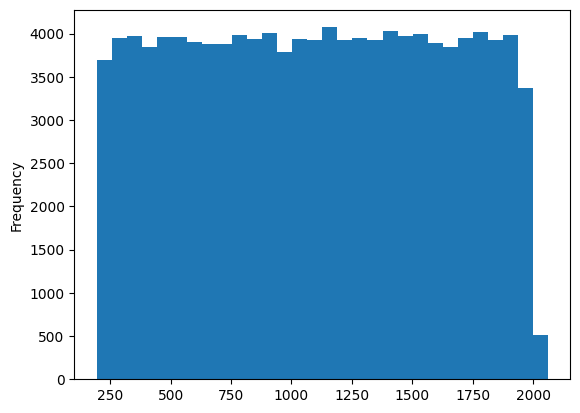

In [1081]:
df['likes'].plot(kind= 'hist', bins=30)

In [1082]:
# df['likes'].fillna(df['likes'].median(), inplace=True)
# df['likes'].isnull().sum()
df['likes'].fillna(0, inplace=True)
df['likes'].isnull().sum()

np.int64(0)

In [1083]:
df['likes'].dtypes

dtype('float64')

In [1084]:
df['likes'] = df['likes'].astype(int)
df['likes'].dtypes

dtype('int64')

#### Comments

In [1085]:
df['comments'].isnull().sum()

np.int64(6000)

In [1086]:
df['comments']

0         320.0
1         346.0
2         187.0
3         242.0
4         477.0
          ...  
122395    147.0
122396     63.0
122397      NaN
122398    106.0
122399      NaN
Name: comments, Length: 120000, dtype: float64

<Axes: ylabel='Frequency'>

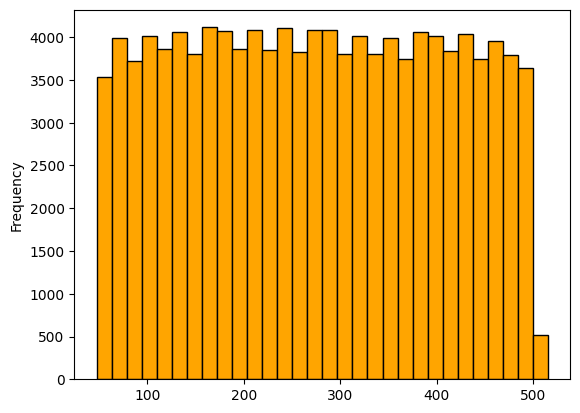

In [1087]:
df['comments'].plot(kind= 'hist', bins=30, color='orange', edgecolor='black')

In [1088]:
df['comments'].fillna(0, inplace=True)
df['comments'].isnull().sum()

np.int64(0)

In [1089]:
df['comments'].dtypes

dtype('float64')

In [1090]:
df['comments'] = df['comments'].astype(int)
df['comments'].dtypes

dtype('int64')

#### Watch time mins

In [1091]:
df['watch_time_minutes'].isnull().sum()

np.int64(6000)

In [1092]:
df['watch_time_minutes']

0         26497.214184
1         15209.747445
2         57332.658498
3         31334.517771
4         15665.666434
              ...     
122395    42075.704885
122396    57563.703040
122397    27549.714659
122398    56967.384382
122399    38466.837135
Name: watch_time_minutes, Length: 120000, dtype: float64

<Axes: ylabel='Frequency'>

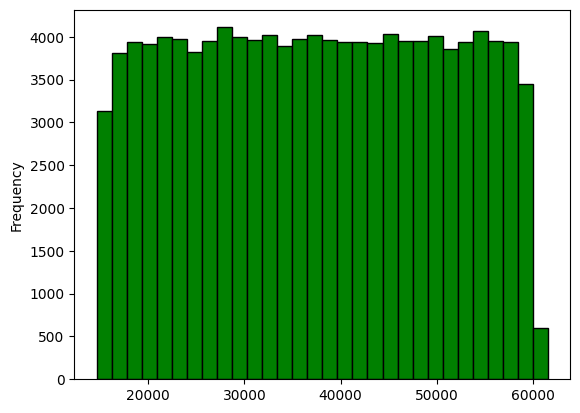

In [1093]:
df['watch_time_minutes'].plot(kind= 'hist', bins= 30, color='green', edgecolor='black')

In [1094]:
df[['views', 'likes', 'comments', 'video_length_minutes', 'watch_time_minutes']].corr()

,views,likes,comments,video_length_minutes,watch_time_minutes
views,1.000000,0.013082,0.014472,0.001171,0.026737
likes,0.013082,1.000000,-0.005489,0.000960,0.002606
comments,0.014472,-0.005489,1.000000,-0.000155,-0.002158
video_length_minutes,0.001171,0.000960,-0.000155,1.000000,-0.000398
watch_time_minutes,0.026737,0.002606,-0.002158,-0.000398,1.000000


In [1095]:
# average watch time per view from non-null rows
avg_watch_time_per_view = (df['watch_time_minutes'] / df['views']).mean()
df['watch_time_minutes'] = df['watch_time_minutes'].fillna(df['views'] * avg_watch_time_per_view)

In [1096]:
df['watch_time_minutes'].isnull().sum()

np.int64(0)

In [1097]:
df['watch_time_minutes'] / (60*24)

0         18.400843
1         10.562325
2         39.814346
3         21.760082
4         10.878935
            ...    
122395    29.219240
122396    39.974794
122397    19.131746
122398    39.560684
122399    26.713081
Name: watch_time_minutes, Length: 120000, dtype: float64

In [1098]:
df['watch_time_days'] = df['watch_time_minutes'] / (60*24)
df['watch_time_days'] = df['watch_time_days'].round(2)
df['watch_time_days'].head()

0    18.40
1    10.56
2    39.81
3    21.76
4    10.88
Name: watch_time_days, dtype: float64

In [1099]:
df.drop(columns=['watch_time_minutes'], inplace= True) # Dropping this as we have created with days

In [1100]:
df

,date,views,likes,comments,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,watch_time_days
0,2024-09-24 10:50:40.993199,9936,1221,320,2.862137,228086,Entertainment,TV,IN,203.178237,18.40
1,2024-09-22 10:50:40.993199,10017,642,346,23.738069,736015,Gaming,Tablet,CA,140.880508,10.56
2,2024-11-21 10:50:40.993199,10097,1979,187,26.200634,240534,Education,TV,CA,360.134008,39.81
3,2025-01-28 10:50:40.993199,10034,1191,242,11.770340,434482,Entertainment,Mobile,UK,224.638261,21.76
4,2025-04-28 10:50:40.993199,9889,1858,477,6.635854,42030,Education,Mobile,CA,165.514388,10.88
...,...,...,...,...,...,...,...,...,...,...,...
122395,2024-12-14 10:50:40.993199,9853,1673,147,25.490195,210818,Education,Tablet,US,280.986396,29.22
122396,2024-07-13 10:50:40.993199,10128,1709,63,16.229133,878860,Music,Desktop,UK,354.612981,39.97
122397,2024-06-10 10:50:40.993199,10267,700,0,23.822365,576756,Tech,Tablet,CA,203.643106,19.13
122398,2024-12-22 10:50:40.993199,10240,1616,106,7.753099,585138,Music,Mobile,UK,351.525811,39.56


### Data Cleaning

In [1101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  120000 non-null  object 
 1   views                 120000 non-null  int64  
 2   likes                 120000 non-null  int64  
 3   comments              120000 non-null  int64  
 4   video_length_minutes  120000 non-null  float64
 5   subscribers           120000 non-null  int64  
 6   category              120000 non-null  object 
 7   device                120000 non-null  object 
 8   country               120000 non-null  object 
 9   ad_revenue_usd        120000 non-null  float64
 10  watch_time_days       120000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 11.0+ MB


#### Date

In [1102]:
df['date']

0         2024-09-24 10:50:40.993199
1         2024-09-22 10:50:40.993199
2         2024-11-21 10:50:40.993199
3         2025-01-28 10:50:40.993199
4         2025-04-28 10:50:40.993199
                     ...            
122395    2024-12-14 10:50:40.993199
122396    2024-07-13 10:50:40.993199
122397    2024-06-10 10:50:40.993199
122398    2024-12-22 10:50:40.993199
122399    2024-06-25 10:50:40.993199
Name: date, Length: 120000, dtype: object

In [1103]:
df['date'] = pd.to_datetime(df['date'])
df['date'].describe()

count                           120000
mean     2024-12-08 03:24:11.233198848
min         2024-06-09 10:50:40.993199
25%      2024-09-07 10:50:40.993199104
50%      2024-12-08 10:50:40.993199104
75%      2025-03-09 10:50:40.993199104
max         2025-06-08 10:50:40.993199
Name: date, dtype: object

In [1104]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_name'] = df['date'].dt.day_name()


In [1105]:
df['day_name'].value_counts()

day_name
Sunday       17303
Tuesday      17225
Thursday     17203
Wednesday    17169
Monday       17168
Saturday     16968
Friday       16964
Name: count, dtype: int64

In [1106]:
df.drop(columns=['date'], inplace=True) # Dropping date column after extracting useful info.

#### Views

In [1107]:
df['views']

0          9936
1         10017
2         10097
3         10034
4          9889
          ...  
122395     9853
122396    10128
122397    10267
122398    10240
122399     9931
Name: views, Length: 120000, dtype: int64

In [1108]:
df['views'].value_counts()

views
9999     520
10023    516
10019    516
9982     512
9993     503
        ... 
9537       1
10337      1
9610       1
9691       1
10335      1
Name: count, Length: 736, dtype: int64

#### Video length mins

In [1109]:
df['video_length_minutes'] = df['video_length_minutes'].round(2)
df['video_length_minutes']

0          2.86
1         23.74
2         26.20
3         11.77
4          6.64
          ...  
122395    25.49
122396    16.23
122397    23.82
122398     7.75
122399    27.31
Name: video_length_minutes, Length: 120000, dtype: float64

#### category

In [1110]:
df['category'].value_counts()

category
Education        20123
Music            20065
Tech             20028
Entertainment    20025
Gaming           19974
Lifestyle        19785
Name: count, dtype: int64

<Axes: xlabel='category'>

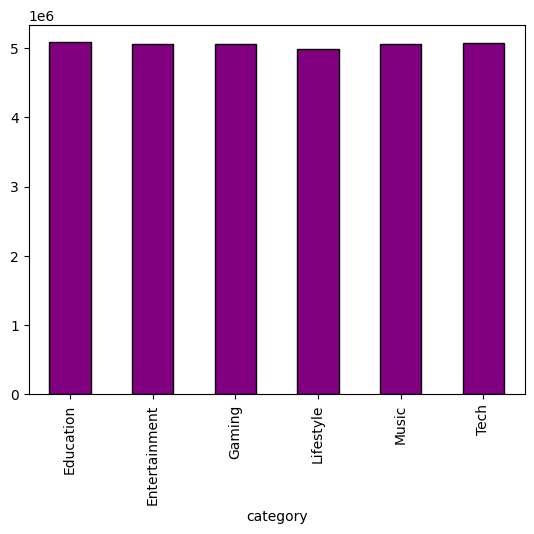

In [1111]:
# barchart of category and revenue
df.groupby('category')['ad_revenue_usd'].sum().plot(kind='bar', color='purple', edgecolor='black')

In [1112]:
import scipy.stats as stats

# Group revenues by category
groups = [df[df['category'] == cat]['ad_revenue_usd'] for cat in df['category'].unique()]

# Run ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Significant difference in revenue across categories")
else:
    print("❌ No significant difference")

F-statistic: 1.91706416276387
P-value: 0.08788330768704347
❌ No significant difference


#### Device

In [1113]:
df['device'].value_counts()

device
TV         30086
Mobile     29989
Desktop    29984
Tablet     29941
Name: count, dtype: int64

<Axes: xlabel='device'>

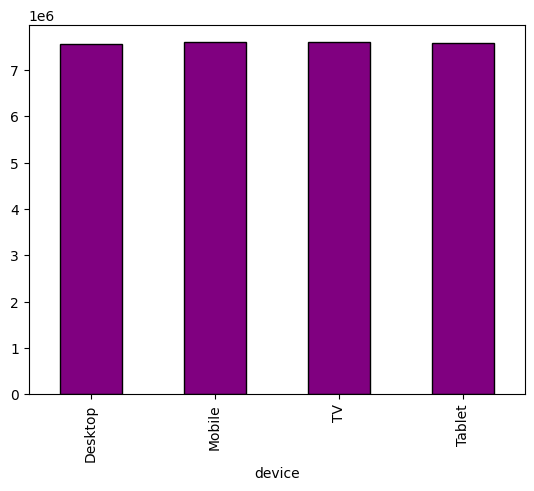

In [1114]:
df.groupby('device')['ad_revenue_usd'].sum().plot(kind='bar', color='purple', edgecolor='black')

In [1115]:
import scipy.stats as stats

# Group revenues by device
groups = [df[df['device'] == cat]['ad_revenue_usd'] for cat in df['device'].unique()]

# Run ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Significant difference in revenue across categories")
else:
    print("❌ No significant difference")

F-statistic: 1.8130185583309124
P-value: 0.1423357134534624
❌ No significant difference


#### Country

In [1116]:
df['country'].value_counts()

country
CA    20198
DE    20160
IN    20156
AU    19911
UK    19893
US    19682
Name: count, dtype: int64

<Axes: xlabel='country'>

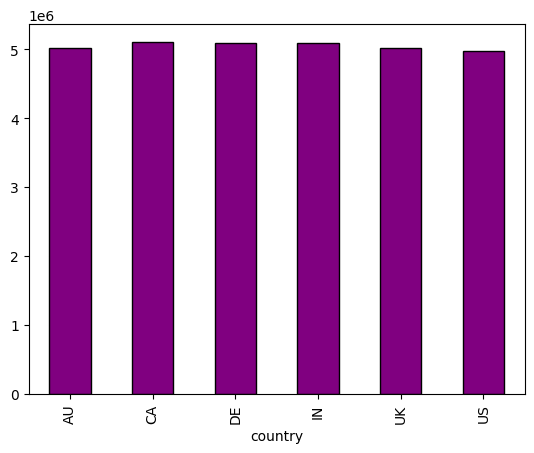

In [1117]:
df.groupby('country')['ad_revenue_usd'].sum().plot(kind='bar', color='purple', edgecolor='black')


In [1118]:
import scipy.stats as stats

# Group revenues by country
groups = [df[df['country'] == cat]['ad_revenue_usd'] for cat in df['country'].unique()]

# Run ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Significant difference in revenue across categories")
else:
    print("❌ No significant difference")

F-statistic: 0.381382240240526
P-value: 0.8618687432381148
❌ No significant difference


#### Ad revenue usd

In [1119]:
df['ad_revenue_usd']

0         203.178237
1         140.880508
2         360.134008
3         224.638261
4         165.514388
             ...    
122395    280.986396
122396    354.612981
122397    203.643106
122398    351.525811
122399    253.842824
Name: ad_revenue_usd, Length: 120000, dtype: float64

In [1120]:
df['ad_revenue_usd'].describe()

count    120000.000000
mean        252.711361
std          61.954125
min         126.590603
25%         199.892158
50%         252.678607
75%         305.613497
max         382.768254
Name: ad_revenue_usd, dtype: float64

In [1121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   views                 120000 non-null  int64  
 1   likes                 120000 non-null  int64  
 2   comments              120000 non-null  int64  
 3   video_length_minutes  120000 non-null  float64
 4   subscribers           120000 non-null  int64  
 5   category              120000 non-null  object 
 6   device                120000 non-null  object 
 7   country               120000 non-null  object 
 8   ad_revenue_usd        120000 non-null  float64
 9   watch_time_days       120000 non-null  float64
 10  day                   120000 non-null  int32  
 11  month                 120000 non-null  int32  
 12  year                  120000 non-null  int32  
 13  day_name              120000 non-null  object 
dtypes: float64(3), int32(3), int64(4), object(4)
memory usage

In [1122]:
# Engagement rate

df['engagement_rate'] = (df['likes'] + df['comments']) / df['views'].replace(0, pd.NA)
df['engagement_rate'] = df['engagement_rate'].fillna(0)

In [1123]:
df['engagement_rate'].value_counts()

engagement_rate
0.000000    304
0.200000     13
0.142857     12
0.166667     11
0.153846      9
           ... 
0.106863      1
0.091253      1
0.185086      1
0.083857      1
0.035559      1
Name: count, Length: 110398, dtype: int64

In [1124]:
df.drop(columns=['likes', 'comments', 'views'], inplace=True)

In [1125]:
df

,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,watch_time_days,day,month,year,day_name,engagement_rate
0,2.86,228086,Entertainment,TV,IN,203.178237,18.40,24,9,2024,Tuesday,0.155093
1,23.74,736015,Gaming,Tablet,CA,140.880508,10.56,22,9,2024,Sunday,0.098632
2,26.20,240534,Education,TV,CA,360.134008,39.81,21,11,2024,Thursday,0.214519
3,11.77,434482,Entertainment,Mobile,UK,224.638261,21.76,28,1,2025,Tuesday,0.142814
4,6.64,42030,Education,Mobile,CA,165.514388,10.88,28,4,2025,Monday,0.236121
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,25.49,210818,Education,Tablet,US,280.986396,29.22,14,12,2024,Saturday,0.184715
122396,16.23,878860,Music,Desktop,UK,354.612981,39.97,13,7,2024,Saturday,0.174961
122397,23.82,576756,Tech,Tablet,CA,203.643106,19.13,10,6,2024,Monday,0.068180
122398,7.75,585138,Music,Mobile,UK,351.525811,39.56,22,12,2024,Sunday,0.168164


In [1126]:
'''
Subscribers alone (0.005 correlation) doesn’t explain revenue, because a big channel might have many subscribers who don’t actually watch.
Engagement alone (0.13 correlation) explains interaction but ignores the channel size.
Multiplying them gives you a "weighted engagement" = how much the subscriber base is engaging.
'''
df['sub_engagement'] = df['subscribers'] * df['engagement_rate']

In [1127]:
corr_with_target = df.corr(numeric_only=True)['ad_revenue_usd'].sort_values(ascending=False)
print(corr_with_target)

ad_revenue_usd          1.000000
watch_time_days         0.964087
engagement_rate         0.131231
sub_engagement          0.079547
subscribers             0.005065
year                    0.001053
month                   0.000872
video_length_minutes    0.000364
day                    -0.002444
Name: ad_revenue_usd, dtype: float64


In [1128]:
df.drop(columns=['day', 'video_length_minutes', 'month', 'year', 'subscribers'], inplace=True)

In [1129]:
corr_with_target = df.corr(numeric_only=True)['ad_revenue_usd'].sort_values(ascending=False)
print(corr_with_target)

ad_revenue_usd     1.000000
watch_time_days    0.964087
engagement_rate    0.131231
sub_engagement     0.079547
Name: ad_revenue_usd, dtype: float64


In [1130]:
x = df.drop(columns=['ad_revenue_usd'])
y = df['ad_revenue_usd']
x, y

(             category   device country  watch_time_days  day_name  \
 0       Entertainment       TV      IN            18.40   Tuesday   
 1              Gaming   Tablet      CA            10.56    Sunday   
 2           Education       TV      CA            39.81  Thursday   
 3       Entertainment   Mobile      UK            21.76   Tuesday   
 4           Education   Mobile      CA            10.88    Monday   
 ...               ...      ...     ...              ...       ...   
 122395      Education   Tablet      US            29.22  Saturday   
 122396          Music  Desktop      UK            39.97  Saturday   
 122397           Tech   Tablet      CA            19.13    Monday   
 122398          Music   Mobile      UK            39.56    Sunday   
 122399           Tech       TV      CA            26.71   Tuesday   
 
         engagement_rate  sub_engagement  
 0              0.155093    35374.449074  
 1              0.098632    72594.870720  
 2              0.214519    5

In [1131]:
df_preprocessed = pd.concat([x, y], axis=1)
df_preprocessed

,category,device,country,watch_time_days,day_name,engagement_rate,sub_engagement,ad_revenue_usd
0,Entertainment,TV,IN,18.40,Tuesday,0.155093,35374.449074,203.178237
1,Gaming,Tablet,CA,10.56,Sunday,0.098632,72594.870720,140.880508
2,Education,TV,CA,39.81,Thursday,0.214519,51599.152620,360.134008
3,Entertainment,Mobile,UK,21.76,Tuesday,0.142814,62050.299581,224.638261
4,Education,Mobile,CA,10.88,Monday,0.236121,9924.163212,165.514388
...,...,...,...,...,...,...,...,...
122395,Education,Tablet,US,29.22,Saturday,0.184715,38941.313306,280.986396
122396,Music,Desktop,UK,39.97,Saturday,0.174961,153765.789889,354.612981
122397,Tech,Tablet,CA,19.13,Monday,0.068180,39322.996007,203.643106
122398,Music,Mobile,UK,39.56,Sunday,0.168164,98399.183203,351.525811


In [1132]:
df_preprocessed.to_csv('D:\Guvi projects\YoutubeAdRevProject\Datasets\preprocessed_df.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Admin\AppData\Local\Temp\ipykernel_12788\547924228.py:1: SyntaxWarning: invalid escape sequence '\G'
  df_preprocessed.to_csv('D:\Guvi projects\YoutubeAdRevProject\Datasets\preprocessed_df.csv', index=False)
